# The miniJPAS survey: star-galaxy classification using machine learning

Codes for graphics used in the paper “The miniJPAS survey: star-galaxy
classification using machine learning” (P. O. Baqui, V. Marra et al.) [https://arxiv.org/abs/2007.07622](https://arxiv.org/abs/2007.07622)


In this code we calculated the ROC curve and Galaxy purity for XMatch catalog analysis

In [1]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from bib import colorline

In [2]:
# read data from SDSS
df_sdss = pd.read_csv('/home/pedro/Desktop/after_referee/fusion/colored/dataset/sdss.csv')
df_sdss = df_sdss[((df_sdss['rSDSS'] >=15) & (df_sdss['rSDSS'] < 18.5))][df_sdss['FLAGS']==0][df_sdss['MASK_FLAGS']==0]


df_sdss = df_sdss[df_sdss['class_SDSS'].notna()]
count1 = df_sdss['class_SDSS'].isna().sum()

/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
# read data from HSC-SUBARU

df_hsc = pd.read_csv('/home/pedro/Desktop/after_referee/fusion/colored/dataset/cross_match_hsc.csv')
df_hsc = df_hsc[((df_hsc['rSDSS'] >= 18.5) & (df_hsc['rSDSS'] <= 23.5))][df_hsc['FLAGS']==0][df_hsc['MASK_FLAGS']==0][df_hsc['r_extendedness_flag']!=1]

df_hsc = df_hsc[df_hsc['r_extendedness_value'].notna()]
count2 = df_hsc['r_extendedness_value'].isna().sum()


In [4]:
# removing missing values in target

df_sdss = df_sdss[df_sdss['class_SDSS'].notna()]
df_hsc = df_hsc[df_hsc['r_extendedness_value'].notna()]


# changing probabilities: 1 = galaxy and 0 = stars

df_sdss['pdf'] = 1-df_sdss['pdf']
df_hsc['pdf'] = 1-df_hsc['pdf']
df_hsc['class_Sextractor'] = 1-df_hsc['class_Sextractor']
df_sdss['class_Sextractor'] = 1-df_sdss['class_Sextractor']


# cheking
count1 = df_sdss['class_SDSS'].isna().sum()
#print(count1)

count2 = df_hsc['r_extendedness_value'].isna().sum()
#print(count2)

In [5]:
# changing labels: 1 = galaxy and 0 = stars

df_sdss['class_SDSS'] = df_sdss['class_SDSS'].apply(lambda x: 0 if x == 6 else 1) 
df_hsc['r_extendedness_value'] = df_hsc['r_extendedness_value'].apply(lambda x: 0 if x == 0.0 else 1) 


In [6]:
# Join catalogue

header = {"label", "pdf", "uJAVA","J0378","J0390","J0400","J0410","J0420","J0430","J0440","J0450","J0460","J0470","J0480","J0490","J0500","J0510","J0520","J0530","J0540","J0550","J0560","J0570","J0580","J0590","J0600","J0610","J0620","J0630","J0640","J0650","J0660","J0670","J0680","J0690","J0700","J0710","J0720","J0730","J0740","J0750","J0760","J0770","J0780","J0790","J0800","J0810","J0820","J0830","J0840","J0850","J0860","J0870","J0880","J0890","J0900","J0910","J1007","uJPAS","gSDSS","rSDSS","iSDSS","c_r","mu_max_mag_apertu","fwhm","alb"}

df_sdss = df_sdss[["class_Sextractor","class_SDSS", "pdf","TILE_ID","uJAVA","J0378","J0390","J0400","J0410","J0420","J0430","J0440","J0450","J0460","J0470","J0480","J0490","J0500","J0510","J0520","J0530","J0540","J0550","J0560","J0570","J0580","J0590","J0600","J0610","J0620","J0630","J0640","J0650","J0660","J0670","J0680","J0690","J0700","J0710","J0720","J0730","J0740","J0750","J0760","J0770","J0780","J0790","J0800","J0810","J0820","J0830","J0840","J0850","J0860","J0870","J0880","J0890","J0900","J0910","J1007","uJPAS","gSDSS","rSDSS","iSDSS","uJAVAerr","J0378err","J0390err","J0400err","J0410err","J0420err","J0430err","J0440err","J0450err","J0460err","J0470err","J0480err","J0490err","J0500err","J0510err","J0520err","J0530err","J0540err","J0550err","J0560err","J0570err","J0580err","J0590err","J0600err","J0610err","J0620err","J0630err","J0640err","J0650err","J0660err","J0670err","J0680err","J0690err","J0700err","J0710err","J0720err","J0730err","J0740err","J0750err","J0760err","J0770err","J0780err","J0790err","J0800err","J0810err","J0820err","J0830err","J0840err","J0850err","J0860err","J0870err","J0880err","J0890err","J0900err","J0910err","J1007err","uJPASerr","gSDSSerr","rSDSSerr","iSDSSerr","c_r","mu_max_mag_apertu","fwhm","alb"]].copy()
df_hsc = df_hsc[["class_Sextractor","r_extendedness_value", "pdf","TILE_ID","uJAVA","J0378","J0390","J0400","J0410","J0420","J0430","J0440","J0450","J0460","J0470","J0480","J0490","J0500","J0510","J0520","J0530","J0540","J0550","J0560","J0570","J0580","J0590","J0600","J0610","J0620","J0630","J0640","J0650","J0660","J0670","J0680","J0690","J0700","J0710","J0720","J0730","J0740","J0750","J0760","J0770","J0780","J0790","J0800","J0810","J0820","J0830","J0840","J0850","J0860","J0870","J0880","J0890","J0900","J0910","J1007","uJPAS","gSDSS","rSDSS","iSDSS","uJAVAerr","J0378err","J0390err","J0400err","J0410err","J0420err","J0430err","J0440err","J0450err","J0460err","J0470err","J0480err","J0490err","J0500err","J0510err","J0520err","J0530err","J0540err","J0550err","J0560err","J0570err","J0580err","J0590err","J0600err","J0610err","J0620err","J0630err","J0640err","J0650err","J0660err","J0670err","J0680err","J0690err","J0700err","J0710err","J0720err","J0730err","J0740err","J0750err","J0760err","J0770err","J0780err","J0790err","J0800err","J0810err","J0820err","J0830err","J0840err","J0850err","J0860err","J0870err","J0880err","J0890err","J0900err","J0910err","J1007err","uJPASerr","gSDSSerr","rSDSSerr","iSDSSerr","c_r","mu_max_mag_apertu","fwhm","alb"]].copy()


df_sdss = df_sdss.rename(columns={"class_SDSS": "label"})
df_hsc  = df_hsc.rename(columns={"r_extendedness_value": "label"})


frames = [df_sdss, df_hsc]
df= pd.concat(frames)

In [7]:
# Tiles

#AEGIS001 - 0.70"
#AEGIS002 - 0.81"
#AEGIS003 - 0.68"
#AEGIS004 - 0.82"

df['TILE_ID'] = df['TILE_ID'].map({2241: 0.70, 2243:0.81, 2406:0.68, 2470:0.82})
print(df.shape)

(11763, 128)


In [8]:
# Separing features and targets

y_all = df[['class_Sextractor','label','pdf']]
x = df.iloc[:,3:] 

print(df.shape)
print('galaxies: %d' % (y_all['label'] == 1).sum())
print('star: %d' % (y_all['label'] == 0).sum())



(11763, 128)
galaxies: 9517
star: 2246


In [9]:
# data separation in training and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(x, y_all, test_size=0.2, random_state=5)

In [10]:
# data standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [11]:
# load weights from model

loaded_ert_morpho = pickle.load(open('weigth_ert_morpho.sav', 'rb'))
ert_test_morpho = loaded_ert_morpho.predict_proba(x_test_std)[:,1] # Probability to be galaxy


loaded_rf_photo = pickle.load(open('weigth_rf_photo.sav', 'rb'))
rf_test_photo = loaded_rf_photo.predict_proba(x_test_std[:,:-4])[:,1] 


loaded_rf_morpho = pickle.load(open('weigth_rf_morpho.sav', 'rb'))
rf_test_morpho = loaded_rf_morpho.predict_proba(x_test_std)[:,1] 


loaded_nn_morpho = pickle.load(open('weigth_nn_morpho.sav', 'rb'))
nn_test_morpho = loaded_nn_morpho.predict_proba(x_test_std)[:,1] 


probas = np.asarray([rf_test_morpho, nn_test_morpho, y_test['pdf']])
el_test = np.average(probas, axis=0, weights=None)


In [12]:
# AUC + plot


clf_labels = ['SGLC','ERT (M+P)','RF (P)']


colors = ['black', 'orange', 'blue', 'green', 'purple','red','pink','black']
linestyles = ['-', ':', '--', '-']
linewidths = [0.5,1.5, 0.7]



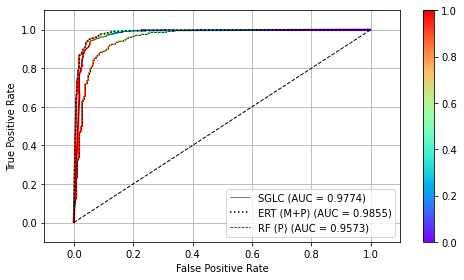

In [13]:
plt.figure(figsize =(7,4))
for y_test_m, values, label, clr, ls, linewidths \
        in zip([y_test['label'], y_test['label'], y_test['label']], [y_test['pdf'], ert_test_morpho, rf_test_photo], clf_labels, colors, linestyles, linewidths):

    fpr, tpr, thresholds = roc_curve(y_true=y_test_m, y_score=values, pos_label=1)
    roc_auc = auc(x=fpr, y=tpr)
       
    lc = colorline(fpr, tpr, thresholds)
    
   
    plt.plot(fpr, tpr,color='k',linestyle=ls, linewidth=linewidths,label='%s (AUC = %0.4f)' % (label, roc_auc))
      
plt.colorbar(lc)           
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=1)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.tight_layout()
plt.show() 
plt.close()


In [14]:
# AUC + plot


clf_labels = ['SGLC','ERT (M+P)','RF (P)']


colors = ['black', 'orange', 'blue', 'green', 'purple','red','pink','black']
linestyles = ['-', ':', '--', '-']
linewidths = [0.5,1.5, 0.7]


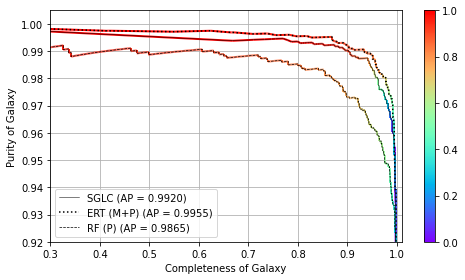

In [15]:

plt.figure(figsize =(7,4))
for y_test_m, values, label, clr, ls, linewidths \
        in zip([y_test['label'], y_test['label'], y_test['label']], [y_test['pdf'], ert_test_morpho, rf_test_photo], clf_labels, colors, linestyles, linewidths):

    precision, recall, thresholds = precision_recall_curve(y_test_m, values, pos_label=1)
       
    lc = colorline(recall, precision, thresholds)
    average_precision = average_precision_score(y_test_m, values)
    plt.plot(recall, precision, color='k', linestyle=ls, linewidth=linewidths,label='%s (AP = %0.4f)' % (label, average_precision))
      
plt.colorbar(lc)           
plt.legend(loc='lower left')


plt.grid()
plt.xlabel('Completeness of Galaxy')
plt.ylabel('Purity of Galaxy')
plt.ylim([0.92, 1.005])
plt.xlim([0.3, 1.01])
plt.tight_layout()
plt.show() 
plt.close()